In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error


Epoch 1/50
211/211 [==============================] - 1s 2ms/step - loss: 26219704320.0000 - val_loss: 25834717184.0000
Epoch 2/50
211/211 [==============================] - 0s 2ms/step - loss: 23959615488.0000 - val_loss: 21120419840.0000
Epoch 3/50
211/211 [==============================] - 0s 1ms/step - loss: 16707558400.0000 - val_loss: 12033280000.0000
Epoch 4/50
211/211 [==============================] - 0s 2ms/step - loss: 8509841920.0000 - val_loss: 5966434304.0000
Epoch 5/50
211/211 [==============================] - 0s 1ms/step - loss: 5248921600.0000 - val_loss: 4724747264.0000
Epoch 6/50
211/211 [==============================] - 0s 2ms/step - loss: 4650624512.0000 - val_loss: 4457708544.0000
Epoch 7/50
211/211 [==============================] - 0s 1ms/step - loss: 4424601088.0000 - val_loss: 4295884288.0000
Epoch 8/50
211/211 [==============================] - 0s 1ms/step - loss: 4270168320.0000 - val_loss: 4168119296.0000
Epoch 9/50
211/211 [==============================

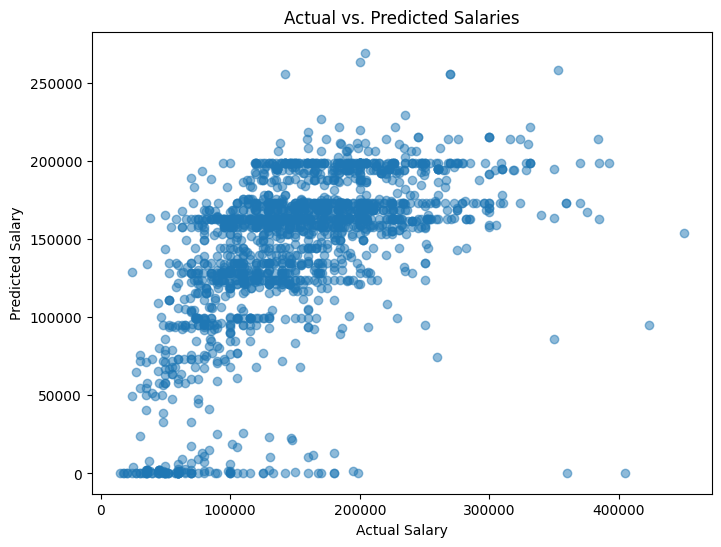

Mean Absolute Error: 41488.85631024245
Mean Squared Error: 3058813544.324822
Root Mean Squared Error: 55306.541605173814
Top 10 Features: Index(['job_title_Data Strategist', 'job_title_Principal Data Scientist',
       'job_title_Director of Data Science', 'job_title_Data Strategy Manager',
       'job_title_Machine Learning Modeler',
       'job_title_Computer Vision Engineer', 'job_title_AI Scientist',
       'job_title_Data Analytics Lead', 'job_title_AI Developer',
       'job_title_Research Scientist'],
      dtype='object')


In [17]:

# Load the data
data = pd.read_csv('jobs_in_data.csv')

# Drop the 'salary_in_usd' column since we're ignoring it
data.drop(columns=['salary_in_usd'], inplace=True)

# Encode categorical variables
data = pd.get_dummies(data)

# Separate features and target
X = data.drop(columns=['salary'])
y = data['salary']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print('Test Loss:', loss)

# Make predictions on the test set
predictions = model.predict(X_test_scaled).flatten()

# Visualize Predictions vs. Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salaries')
plt.show()

# Calculate Evaluation Metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

# Feature Importance
# Get the weights of the first layer
weights = model.layers[0].get_weights()[0]

# Calculate the importance of features based on the weights
feature_importance = np.mean(np.abs(weights), axis=0)

# Get feature names
feature_names = X.columns

# Sort features by importance
sorted_indices = np.argsort(feature_importance)[::-1]

# Top 10 features
top_features = feature_names[sorted_indices][:10]
print('Top 10 Features:', top_features)